# TP1 Prétraitement acoustique et Analyse en Composantes Principales

NOM - PRÉNOM : Gonzalez Jean-Loup

Déposer le notebook sur moodle à la fin de la séance. 

In [55]:
import numpy as np
import scipy.io.wavfile as wav
from canaux24 import canaux
from scipy import linalg
import matplotlib.pyplot as plt
import os

### Prétraitements élémentaires
Définition de la fonction lecture qui permet de récupérer la matrice des observations.

 ### Traitements : 
 ATTENTION 
 Procéder par étape en écrivant le code dans une cellule et en traçant le résultat dans la cellule suivante 
 Affichage des matices, des vecteurs, de leur taille ceci afin de vérifier la cohérence des résultats. 
 

In [78]:
nomSignaux=[]
for nomFichier in os.listdir('Signal'):
    #Remplissage d'une liste avec le noms des fichiers
    nomSignaux.append(nomFichier)
nomSignaux.sort()
#récupération de la fe d'un échantillon (le 6, par exemple)
(f_ech,echantillon)=wav.read('Signal/'+nomSignaux[5])
print("frequence d'echantillonage : " +str(f_ech))
# Définition de la fonction lecture 
def lecture(voyelle,nbEchantillons):
    obs=[]
    cmpt=0
    for nomSignal in nomSignaux:
        if(nomSignal[0:2]==voyelle and cmpt <20):
            signal=wav.read('Signal/'+nomSignal)
            mel= canaux(signal[1],f_ech)
            obs.append(mel)   
            cmpt=cmpt+1
    return obs



frequence d'echantillonage : 16000


In [79]:
# Lecture des 20 fichiers pour chacune des classes
# les observations recuperees sont reduites à 24D grâce à MEL qui
# calcule les MFCC (grace à des FFT)
obsaa = lecture('aa', 20)
obsuu = lecture('uu', 20)
obsii = lecture('ii', 20)

In [144]:
# Créer une matrice contenant l'ensemble des observations à traiter
# la matrice R est de dim 24
R = np.vstack((obsaa, obsuu, obsii))
Rt=R.transpose()
print(np.shape(Rt))

(24, 60)


In [145]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.
# on calcule les vacteurs propres de R (24D)
# on ne garde que les 2 plus fortes val propres, c'est a dire les 
# 2D qui sont les plus caractéristiques (moins de perte d'information lors
# de la réduction de dimension)
# permet de rendre la matrice R carrée (pour utiliser linalg)
matriceCov=np.cov(Rt)
# calcul les val propres et les vect propres de la matrice de cov de R
(valPropres,vectPropres)=linalg.eig(matriceCov)
print(vectPropres)

[[-4.58258772e-03  5.87687541e-04 -1.03534506e-02  1.64002609e-02
  -1.33960772e-02  1.29936691e-02  1.37387425e-03 -5.05408368e-03
  -1.06158527e-02 -7.72427670e-03  2.70668054e-02 -8.57658002e-02
   7.82236117e-03 -6.97944891e-02 -1.01853962e-01  2.09432233e-01
  -2.74490800e-02 -4.52085487e-02 -1.43116279e-01 -5.68069344e-01
  -6.06515752e-01  1.28609136e-01 -4.45212501e-01  5.65625568e-02]
 [-1.55786437e-01  2.15067311e-01 -1.95398337e-01  4.94891564e-01
  -5.21625919e-02  2.85349294e-01  4.64325543e-01  1.28179836e-01
  -9.91292135e-02 -2.03672359e-01 -8.42073578e-02 -4.37662705e-01
  -1.35183207e-02  2.66367174e-02 -8.30841488e-02 -1.82106037e-01
  -1.83653102e-01 -3.19163806e-02  1.61380333e-02 -2.08417912e-02
   5.44392614e-02  1.74096172e-02  1.75280145e-02  1.68148947e-02]
 [-3.02068036e-01 -2.23587692e-02 -2.38907107e-01  5.55681084e-01
   2.42683933e-01  2.18058324e-01 -5.52970554e-01 -4.65583345e-02
   1.07958923e-01 -1.15883238e-03  5.17600201e-02  1.68803637e-01
   1.057

In [137]:
# Pour cela, 
# 1 - rechercher les deux valeurs propres maximales 
vp1=np.max(valPropres)
indexVp1=np.where(valPropres==vp1)
inter=np.delete(valPropres,indexVp1)
vp2=np.max(inter)
indexVp2=np.where(valPropres==vp2)
print(vp1,vp2)

(5295554841433.581+0j) (465469342942.36774+0j)


In [129]:
# 2-  prendre les vercteurs propres correspondants
vectPropre1=vectPropres[indexVp1]
vectPropre2=vectPropres[indexVp2]
print(vectPropre1)
print(vectPropre2)
print(indexVp1)
print(indexVp2)

[[-4.58258772e-03  5.87687541e-04 -1.03534506e-02  1.64002609e-02
  -1.33960772e-02  1.29936691e-02  1.37387425e-03 -5.05408368e-03
  -1.06158527e-02 -7.72427670e-03  2.70668054e-02 -8.57658002e-02
   7.82236117e-03 -6.97944891e-02 -1.01853962e-01  2.09432233e-01
  -2.74490800e-02 -4.52085487e-02 -1.43116279e-01 -5.68069344e-01
  -6.06515752e-01  1.28609136e-01 -4.45212501e-01  5.65625568e-02]]
[[-0.15578644  0.21506731 -0.19539834  0.49489156 -0.05216259  0.28534929
   0.46432554  0.12817984 -0.09912921 -0.20367236 -0.08420736 -0.43766271
  -0.01351832  0.02663672 -0.08308415 -0.18210604 -0.1836531  -0.03191638
   0.01613803 -0.02084179  0.05443926  0.01740962  0.01752801  0.01681489]]
(array([0]),)
(array([1]),)


In [148]:
# 3-  projeter R dans ce nouvel espace 
# on garde les 2 premieres colonnes de la matrice vectPropres, 
# qui correspondent aux 2 vect propres aux val prores max
matrix_vectPropres_max=vectPropres[:,:2]
print(np.shape(vectPropres))
# on multiplie matrix_vectPropres_max et R pour projeter R dans un espace 2D
R_projetee=np.dot(R,matrix_vectPropres_max)
print(R_projetee)

(24, 24)
[[ 6332564.81671094   915722.77739118]
 [ 3763264.39904398   758551.66407297]
 [ 3289598.85357857   753880.61226504]
 [ 5096495.98624228    47513.76446452]
 [ 4000851.39463877   475223.74765521]
 [ 3659795.52746406   268969.10102232]
 [ 4172667.25484518    49985.53495553]
 [ 3630064.79515597   296418.93018667]
 [ 3647524.75903319   417922.13624977]
 [ 4379492.2936544     -7733.15436754]
 [ 4448084.00826767   198595.42735169]
 [ 4150146.07111235   220436.51724533]
 [ 4750698.49100766    82355.16499967]
 [ 4340925.04041347    60443.34088412]
 [ 3011269.47935565   570755.03240877]
 [ 4893718.57074652   337777.33525538]
 [ 3604204.46907551   556519.52357904]
 [ 3101522.13585758   691979.65561261]
 [ 4100987.26616272   774320.1802287 ]
 [ 2563226.11842375  1117826.63525089]
 [ -537593.37598661  1435943.78466189]
 [ -553681.93996248  1298626.91222908]
 [ -561745.13769707  1141194.11565747]
 [ -868423.38132332  1120618.96782283]
 [-1021937.72406049  1080401.25012004]
 [ -977672.83343

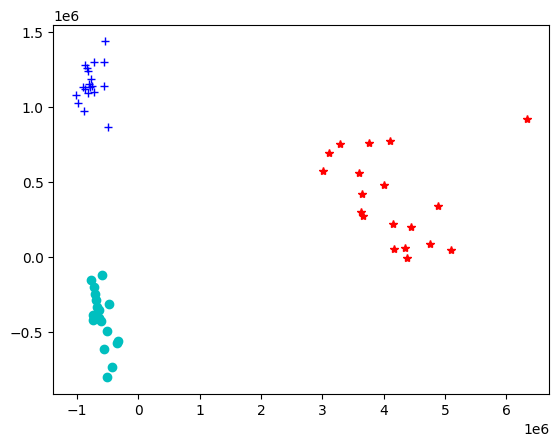

In [156]:
# 4- et effectuer un tracé
# Afficher les nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes ; Mettre une légende.
R_projetee_A=np.dot(R[:19],matrix_vectPropres_max)
R_projetee_U=np.dot(R[20:39],matrix_vectPropres_max)
R_projetee_I=np.dot(R[40:59],matrix_vectPropres_max)
plt.plot(R_projetee_A[:,0],R_projetee_A[:,1],'r*',label="A")
plt.plot(R_projetee_U[:,0],R_projetee_U[:,1],'b+',label="U")
plt.plot(R_projetee_I[:,0],R_projetee_I[:,1],'co',label="I")


In [5]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 
# que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?

In [6]:
# Pour cela
# 5- rechercher les deux valeurs propres minimales

### Généralisation
Réaliser le même traitement avec tous les fichiers (100) des 3 classes. Est-ce toujours séparable ?
Effectuer le même traitement sur les 10 voyelles et commenter les résultats... Ajouter les cellules nécessaires. 